In [13]:
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
import copy as cp

#+____IMPORT FESOM RELATET ROUTINES____________________________________________+
from set_inputarray  import *
from sub_fesom_mesh  import * 
from sub_fesom_mesh  import * 
from sub_fesom_data  import * 
from sub_fesom_plot  import *
from colormap_c2c    import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM MESH ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# for more options look in set_inputarray.py
inputarray=set_inputarray()
inputarray['save_fig'        ] = True
inputarray['save_figpath'    ] = '/home/ollie/pscholz/figures/poster_TRR181_winterschool/'


# set plot box for cyl projection (default: [-180,180,-90,90])
#inputarray['which_box'] = [0,360,-90,90] ; inputarray['mesh_focus']=180
inputarray['which_box'] = [-180,180,-90,90]
#inputarray['which_box'] = [-90,35,20,85]
#inputarray['which_box'] = [-180,180,35,90]
#inputarray['which_box'] = [-180,180,-90,-50]

# set projection variable --> the lon/lat projection plot ranges are set via 
# inputarray['which_box'] = [lonmin,lonmax,latmin,latmax]
inputarray['proj'     ] = 'cyl' # 'ortho', 'cyl', 'npstere' , 'spstere'
inputarray['proj_lon' ] = -45 #only for ortho
inputarray['proj_lat' ] = 45 #only for ortho

inputarray['mesh_id'		 ] = 'COREv2'
inputarray['mesh_dir'		 ] = '/work/ollie/pscholz/mesh_fesom2.0/mesh_CORE2_final/'
try:
	mesh
except NameError:
	mesh = fesom_init_mesh(inputarray)
else:
	print(" --> ___FOUND FESOM MESH --> will use it!___________________________")

 --> ___FOUND FESOM MESH --> will use it!___________________________


In [21]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** SET INPUT PARAMETER ***                         |
#|                                                                             |
#+_____________________________________________________________________________+
# setup variable name, runid and data path
data 			= fesom_data(inputarray) # init fesom2.0 data object
data.descript,data.path = 'linfs' , '../results/linfs/withoutPC-1/'
data.var 		= 'temp'

#data.crange     = []
data.crange     = [-2.0,2.0,0] # [cmin, cmax, cref]
#data.cmap       = 'rygbw'  
#data.cnumb      = 25

#+_____________________________________________________________________________+
# select year to average over [start_yr, end_yr]
data.year		= [1960,2009]
#data.year		= [1990,2000]
#data.year		= [2000,2000]

# select month to average over
data.month		= [1,2,3,4,5,6,7,8,9,10,11,12]
#data.month		= [1,2,12]
#data.month		= [6,7,8]
#data.month		= [3]

# select linear interpolated depth layers to average over
#data.depth		= [0,10,20,30,40,50,75,100]
#data.depth		= np.arange(   0, 200+1,10)
#data.depth		= np.arange( 200, 500+1,20)
#data.depth		= np.arange( 500,1000+1,50)
data.depth		= np.arange(1000,1500+1,50)
#data.depth		= [50]

#+_____________________________________________________________________________+
# make anomaly
do_anomaly      = True
#do_anomaly      = False
if do_anomaly==True:
	data2 			= cp.copy(data) # init fesom2.0 data object
	#data2.descript,data2.path = 'zstar','../results/zstar/withoutPC-1/'
	data2.descript,data2.path = 'zlevel','../results/zlevel/withoutPC-1/'
	#data2.descript,data2.path = 'zstar' ,'/scratch/users/pscholz/ollie_work/results_ALE/zstar/withoutPC-2/'
	
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# plot topography
if data.var=='depth':
	data.value 	= -mesh.nodes_2d_z
	#data.value 	= mesh.nodes_2d_iz
	data.sname, data.lname, data.unit, data.cmap = 'depth', 'Depth', 'm', 'wbgyr'
	data.levels = np.arange(0,np.max(data.value),200)# set resolution levels
#_______________________________________________________________________________
# plot triangle resolution interpolated to node
elif data.var=='triresol':
	if len(mesh.nodes_2d_resol)==0: mesh.fesom_calc_triresol()
	data.value 	= mesh.nodes_2d_resol
	data.sname, data.lname, data.unit, data.cmap = 'triresol', 'Resolution', 'km', 'odv'
	data.levels = np.arange(0,np.max(data.value),10)# set resolution levels
#_______________________________________________________________________________
# plot triangle area interpolated to node
elif data.var=='triarea':
	if len(mesh.nodes_2d_area)==0: mesh.fesom_calc_triarea()
	data.value 	= mesh.nodes_2d_area
	data.sname,data.lname, data.unit, data.cmap= 'triarea', 'Area', 'km^2', 'cmocean.cm.balance'
	data.levels = np.arange(0,np.max(data.value),10)# set resolution levels
#_______________________________________________________________________________
# load all other 2d and 3d variables
else:
	fesom_load_data_horiz(mesh,data,do_output='False')
	if do_anomaly==True:
		fesom_load_data_horiz(mesh,data2,do_output='False')
		anom = fesom_data_anom(data,data2)

     --> ../results/linfs/withoutPC-1/
     --> temp


/home-nfs/ollie/pscholz/fvom_ALE_git/view_pscholz/sub_fesom_data.py:874: RuntimeWarning: invalid value encountered in true_divide
  data_out = data_out/aux_div


     --> ../results/zlevel/withoutPC-1/
     --> temp



___PLOT 2D DATA____________________________________________


<IPython.core.display.Javascript object>


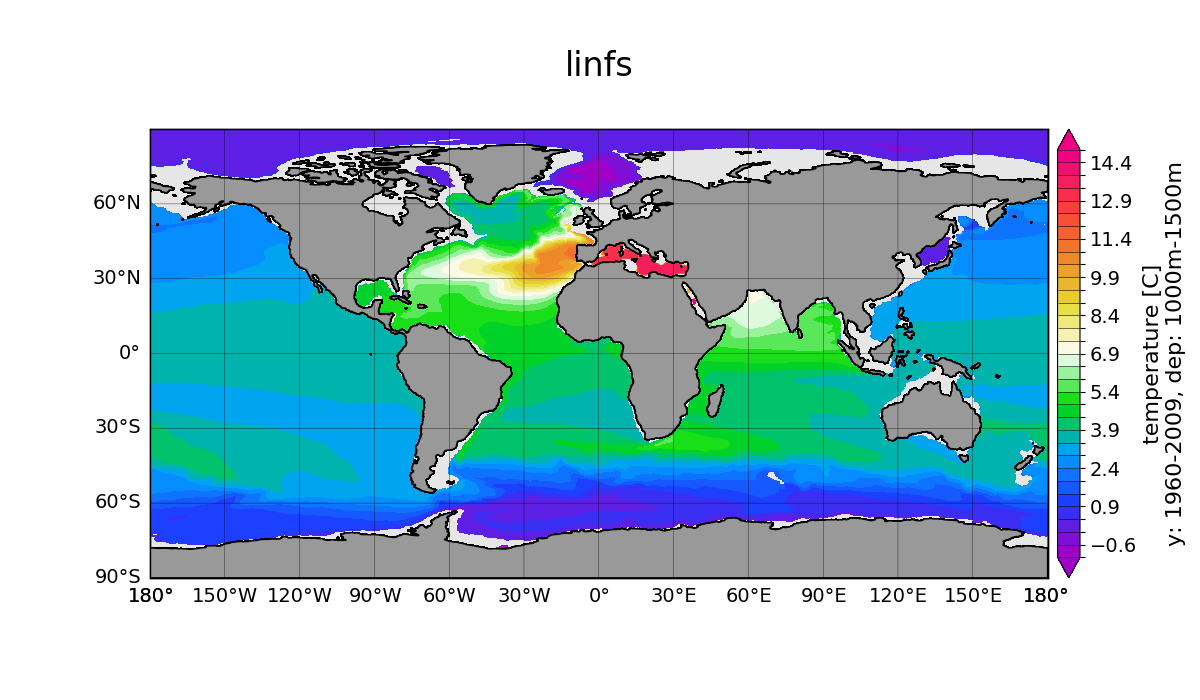

[cmin,cmax,cref] = [-0.87969763996373, 14.671430723222832, 6.9]
clevel =  [ -1.1  -0.6  -0.1   0.4   0.9   1.4   1.9   2.4   2.9   3.4   3.9   4.4
   4.9   5.4   5.9   6.4   6.9   7.4   7.9   8.4   8.9   9.4   9.9  10.4
  10.9  11.4  11.9  12.4  12.9  13.4  13.9  14.4  14.9]


/home-nfs/ollie/pscholz/fvom_ALE_git/view_pscholz/sub_fesom_plot.py:223: RuntimeWarning: invalid value encountered in less
  data_plot[data_plot<clevel[0]]  = clevel[0]+np.finfo(np.float32).eps
/home-nfs/ollie/pscholz/fvom_ALE_git/view_pscholz/sub_fesom_plot.py:224: RuntimeWarning: invalid value encountered in greater
  data_plot[data_plot>clevel[-1]] = clevel[-1]-np.finfo(np.float32).eps


 --> save figure: png

___PLOT 2D DATA____________________________________________


<IPython.core.display.Javascript object>


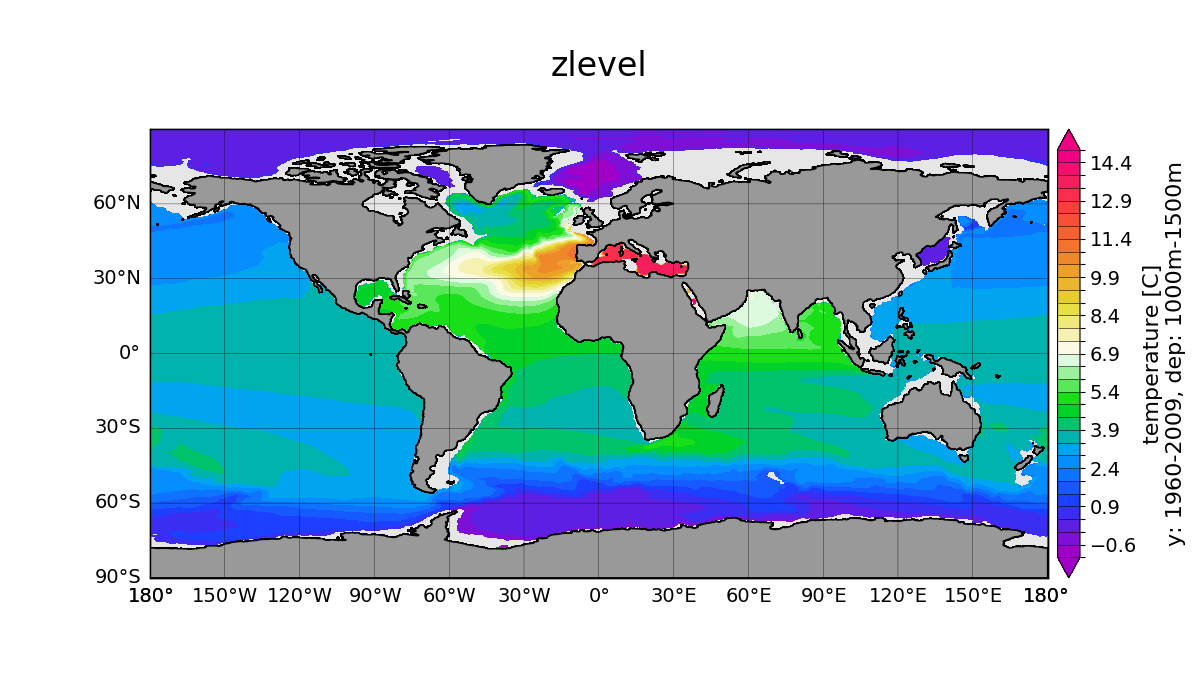

[cmin,cmax,cref] = [-0.87969763996373, 14.671430723222832, 6.9]
clevel =  [ -1.1  -0.6  -0.1   0.4   0.9   1.4   1.9   2.4   2.9   3.4   3.9   4.4
   4.9   5.4   5.9   6.4   6.9   7.4   7.9   8.4   8.9   9.4   9.9  10.4
  10.9  11.4  11.9  12.4  12.9  13.4  13.9  14.4  14.9]
 --> save figure: png

___PLOT 2D DATA____________________________________________


<IPython.core.display.Javascript object>


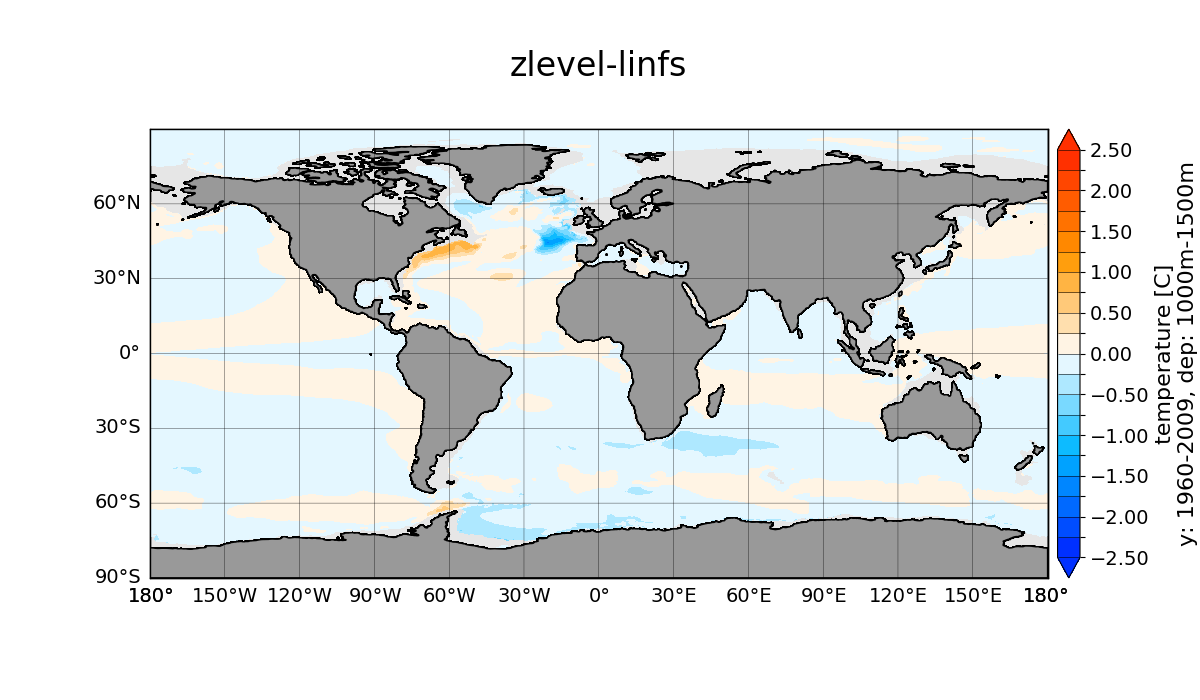

[cmin,cmax,cref] = [-2.5, 2.5, 0.0]
clevel =  [-2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25
  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5 ]
 --> save figure: png


In [22]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** PLOT FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# plot 2d and 2dvec data
if len(data.value2)==0:
	#___________________________________________________________________________
	# plot anomaly
	if do_anomaly==False:
		#_______________________________________________________________________
		if data.value.size == mesh.n2dea: data.value = mesh.fesom_interp_e2n(np.array(data.value))
		fig,ax,map,cbar=fesom_plot2d_data(mesh,data,figsize=[12,7])
	else:
		#_______________________________________________________________________
		# interpolate elemental values to nodal vlaues
		if data.value.size  == mesh.n2dea: data.value  = mesh.fesom_interp_e2n(np.array(data.value))
		if data2.value.size == mesh.n2dea: data2.value = mesh.fesom_interp_e2n(np.array(data2.value))
		if anom.value.size  == mesh.n2dea: anom.value  = mesh.fesom_interp_e2n(np.array(anom.value))
		
		#_______________________________________________________________________
		# do common crange for line and lin2
		cmax = np.max([np.nanmax(data.value),np.nanmax(data2.value)])
		cmin = np.min([np.nanmin(data.value),np.nanmin(data2.value)])
		cref = cmin + (cmax-cmin)/2
		cref = np.around(cref, -np.int32(np.floor(np.log10(np.abs(cref)))-1) ) 
		data.crange = [cmin,cmax,cref]	
		data2.crange= [cmin,cmax,cref]
		
		#_______________________________________________________________________
		fig,ax,map,cbar=fesom_plot2d_data(mesh,data,figsize=[12,7])
		fig,ax,map,cbar=fesom_plot2d_data(mesh,data2,figsize=[12,7])
		anom.crange=[-2.5,2.5,0.0]
		fig,ax,map,cbar=fesom_plot2d_data(mesh,anom,figsize=[12,7])
		
else:
	
	fesom_plot2dvec_data(mesh,data)